#Pune Flood Sensor Data
In this notebook we will analyse Pune flood sensor data. 

### Load required modules and install pyIUDX module.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates
import folium
from folium import plugins

In [0]:
# install the latest version of pyIUDX module from github
pip install git+https://github.com/iudx/pyIUDX

  Cloning https://github.com/iudx/pyIUDX to /tmp/pip-req-build-udu0m7dn
  Running command git clone -q https://github.com/iudx/pyIUDX /tmp/pip-req-build-udu0m7dn
  Created wheel for pyIUDX: filename=pyIUDX-0.0.1-cp36-none-any.whl size=22736 sha256=0f13d5e329862aa0fa5930bb4bbaadc9c1b3fe750793cffc113876b2f72c5159
  Stored in directory: /tmp/pip-ephem-wheel-cache-l293s4xm/wheels/9a/47/49/4628dcd08582cacb7599b922e10d77572044b4c49fe076e0e8
Successfully built pyIUDX


In [0]:
from pyIUDX.cat import cat
# Specify the catalogue server details.
# initialize a catalogue class
cat = cat.Catalogue("https://pudx.catalogue.iudx.org.in/catalogue/v1")

In [0]:
geo1 = {"circle": {"lat": 18.539107, "lon": 73.853987, "radius": 30000}}
attributes = {"tags": ["flood"]}
filters = ["id"]

all_flood_ItemsByID = cat.getManyResourceItems(attributes, filters, geo=geo1)
print(all_flood_ItemsByID)
print("Number of items = ", len(all_flood_ItemsByID))

[{'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Hingne Khurd SR NO 18'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Katraj Mumbai Highway'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Prayega City'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Uttam Nagar(Indiranagar)'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Sangam Cross Road'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Wakad'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Opp. Dattanagar Baner Balawadi Cross'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Pashan Bopodi Nala'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/p

In [0]:
# Import the item class from pyIUDX.rs
from pyIUDX.rs import item
m = folium.Map(location=[18.5204,73.8567],zoom_start=12)
plugins.ScrollZoomToggler().add_to(m)
flood_sensors = item.Items("https://pudx.catalogue.iudx.org.in/catalogue/v1", all_flood_ItemsByID)
print(flood_sensors[0].geoProperties)
for sensor in flood_sensors:
  sensor_id = sensor.id  
  print("Sensor location = ", sensor.location.coordinates)
  folium.Marker([sensor.location.coordinates[1], sensor.location.coordinates[0] ], popup=sensor_id).add_to(m)    
m

['location']
Sensor location =  [73.783856, 18.5625691]
Sensor location =  [73.815, 18.466743]
Sensor location =  [73.82616, 18.576302]
Sensor location =  [73.831801, 18.478267]
Sensor location =  [73.7911981, 18.5362241]
Sensor location =  [73.7733941, 18.4585]
Sensor location =  [73.75912, 18.5871341]
Sensor location =  [73.8094, 18.474711]
Sensor location =  [73.798638, 18.5471501]
Sensor location =  [73.8329631, 18.573808]
Sensor location =  [73.82772, 18.488375]
Sensor location =  [73.8364779, 18.5047619]
Sensor location =  [73.8115129, 18.56794]
Sensor location =  [73.8261239, 18.498396]
Sensor location =  [73.8638231, 18.4920141]
Sensor location =  [73.802805, 18.483614]
Sensor location =  [73.860397, 18.529627]
Sensor location =  [73.855672, 18.5325731]
Sensor location =  [73.844455, 18.515439]
Sensor location =  [73.8739201, 18.558761]
Sensor location =  [73.8430339, 18.5135281]
Sensor location =  [73.84946, 18.520586]
Sensor location =  [73.8766279, 18.576073]
Sensor location

In [0]:
print(flood_sensors[0].quantitativeProperties)

['ALERT', 'CUR_LEVEL', 'DANGER', 'M_DISTANCE', 'REF_LEVEL']


Let's choose dates where there was flooding in the riverbed. These are -
August 5th and
September 25th.

In [0]:
flood_sensors.during("2019-09-23T00:00:00.000+05:30", "2019-09-27T00:00:00.000+05:30")

<Items [<pyIUDX.rs.item.Item object at 0x7fce27f44358>, <pyIUDX.rs.item.Item object at 0x7fce2666a4e0>, <pyIUDX.rs.item.Item object at 0x7fce27f95dd8>, <pyIUDX.rs.item.Item object at 0x7fce266e7940>, <pyIUDX.rs.item.Item object at 0x7fce28903cf8>, <pyIUDX.rs.item.Item object at 0x7fce266a7668>, <pyIUDX.rs.item.Item object at 0x7fce27f15630>, <pyIUDX.rs.item.Item object at 0x7fce27f44940>, <pyIUDX.rs.item.Item object at 0x7fce265fdb70>, <pyIUDX.rs.item.Item object at 0x7fce2665c978>, <pyIUDX.rs.item.Item object at 0x7fce26600438>, <pyIUDX.rs.item.Item object at 0x7fce265ce470>, <pyIUDX.rs.item.Item object at 0x7fce2665e6a0>, <pyIUDX.rs.item.Item object at 0x7fce26467240>, <pyIUDX.rs.item.Item object at 0x7fce2645cb38>, <pyIUDX.rs.item.Item object at 0x7fce264252e8>, <pyIUDX.rs.item.Item object at 0x7fce26603a20>, <pyIUDX.rs.item.Item object at 0x7fce263c8a58>, <pyIUDX.rs.item.Item object at 0x7fce27f344e0>, <pyIUDX.rs.item.Item object at 0x7fce264463c8>, <pyIUDX.rs.item.Item object at 0

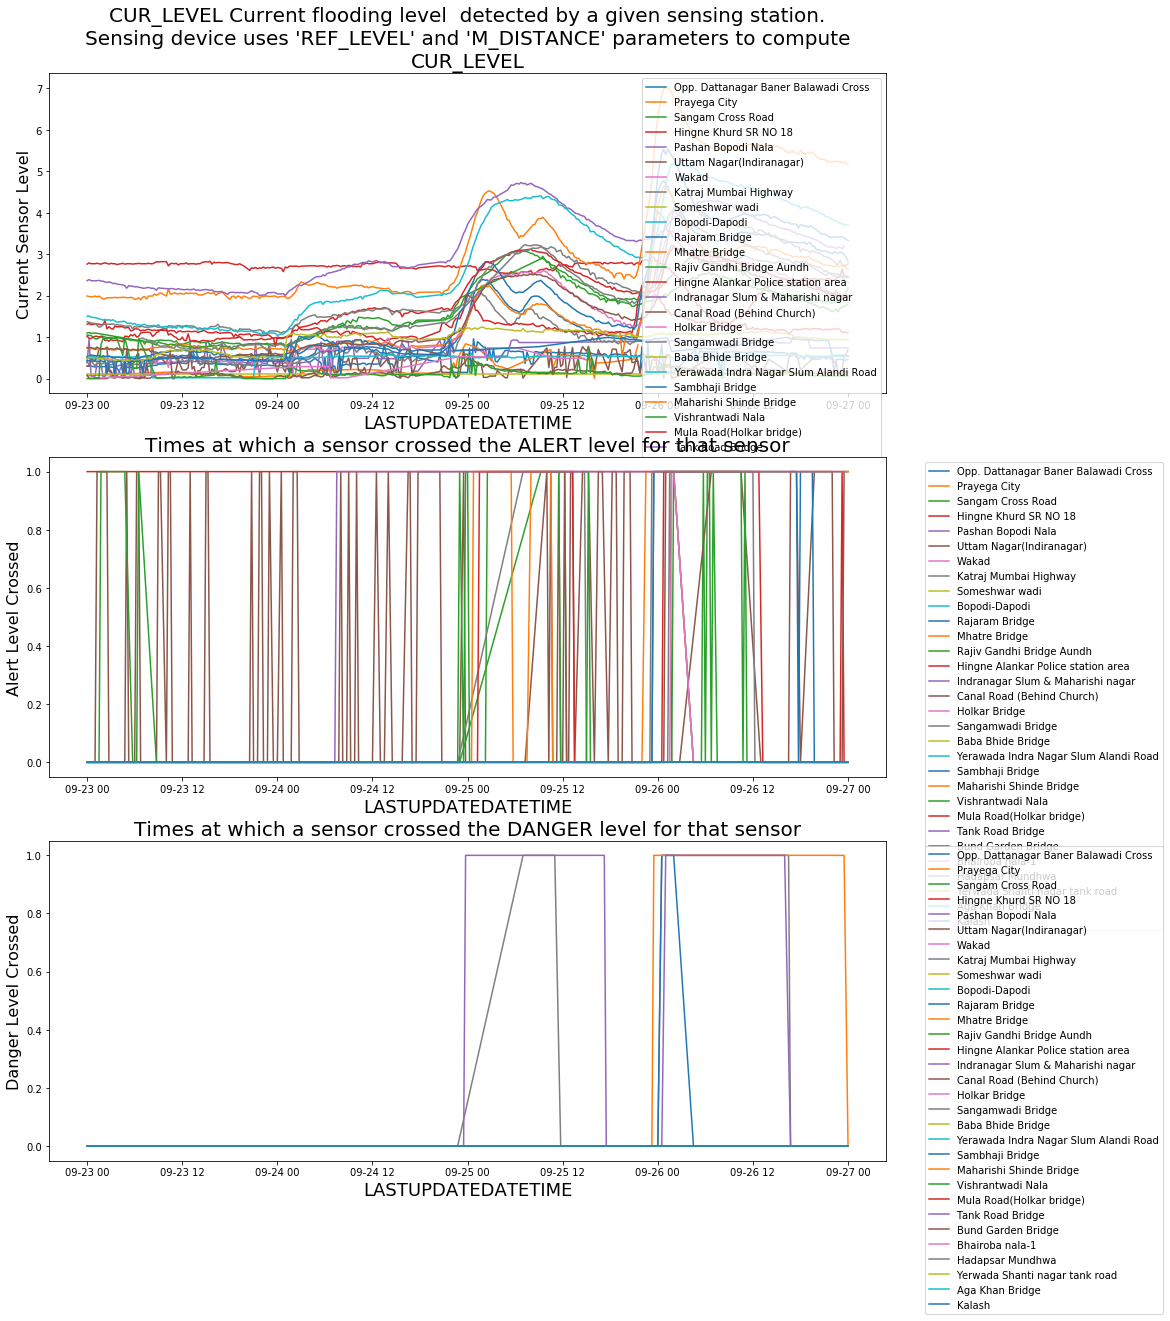

In [0]:
import matplotlib.pyplot as plt
from textwrap import wrap

fig, axis = plt.subplots(3,1,figsize=(15,20))
plt.subplot(3,1,1)
plt.title("\n".join(wrap(flood_sensors[1].CUR_LEVEL.name + "\n" + flood_sensors[1].CUR_LEVEL.describes)), fontsize=20)
for sensor in flood_sensors:
  plt.plot(sensor.CUR_LEVEL.value[:,0], sensor.CUR_LEVEL.value[:,1], label=sensor.id.split("/")[-1])
plt.legend()
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Current Sensor Level", fontsize=16)

plt.subplot(3,1,2)
plt.title("\n".join(wrap("Times at which a sensor crossed the ALERT level for that sensor")), fontsize=20)
for sensor in flood_sensors:
  crossed_alert = np.greater_equal(sensor.CUR_LEVEL.value[:,1], sensor.ALERT.value[:,1])
  plt.plot(sensor.ALERT.value[:,0], crossed_alert, label=sensor.id.split("/")[-1])
plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Alert Level Crossed", fontsize=16)

plt.subplot(3,1,3)
plt.title("\n".join(wrap("Times at which a sensor crossed the DANGER level for that sensor")), fontsize=20)
for sensor in flood_sensors:
  crossed_danger = np.greater_equal(sensor.CUR_LEVEL.value[:,1], sensor.DANGER.value[:,1])
  plt.plot(sensor.DANGER.value[:,0], crossed_danger, label=sensor.id.split("/")[-1])
plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Danger Level Crossed", fontsize=16)
plt.show()

Similarly, for August 5th

In [0]:
flood_sensors.during("2019-08-03T00:00:00.000+05:30", "2019-08-07T00:00:00.000+05:30")

<Items [<pyIUDX.rs.item.Item object at 0x7fce28803198>, <pyIUDX.rs.item.Item object at 0x7fce284324e0>, <pyIUDX.rs.item.Item object at 0x7fce288030f0>, <pyIUDX.rs.item.Item object at 0x7fce28633320>, <pyIUDX.rs.item.Item object at 0x7fce28803128>, <pyIUDX.rs.item.Item object at 0x7fce28505a90>, <pyIUDX.rs.item.Item object at 0x7fce288030b8>, <pyIUDX.rs.item.Item object at 0x7fce28803a58>, <pyIUDX.rs.item.Item object at 0x7fce28803518>, <pyIUDX.rs.item.Item object at 0x7fce284a46d8>, <pyIUDX.rs.item.Item object at 0x7fce25c0b6a0>, <pyIUDX.rs.item.Item object at 0x7fce25aff630>, <pyIUDX.rs.item.Item object at 0x7fce28803240>, <pyIUDX.rs.item.Item object at 0x7fce2880b7f0>, <pyIUDX.rs.item.Item object at 0x7fce2860f080>, <pyIUDX.rs.item.Item object at 0x7fce284ae0b8>, <pyIUDX.rs.item.Item object at 0x7fce28a0d048>, <pyIUDX.rs.item.Item object at 0x7fce288db908>, <pyIUDX.rs.item.Item object at 0x7fce28803080>, <pyIUDX.rs.item.Item object at 0x7fce28423748>, <pyIUDX.rs.item.Item object at 0

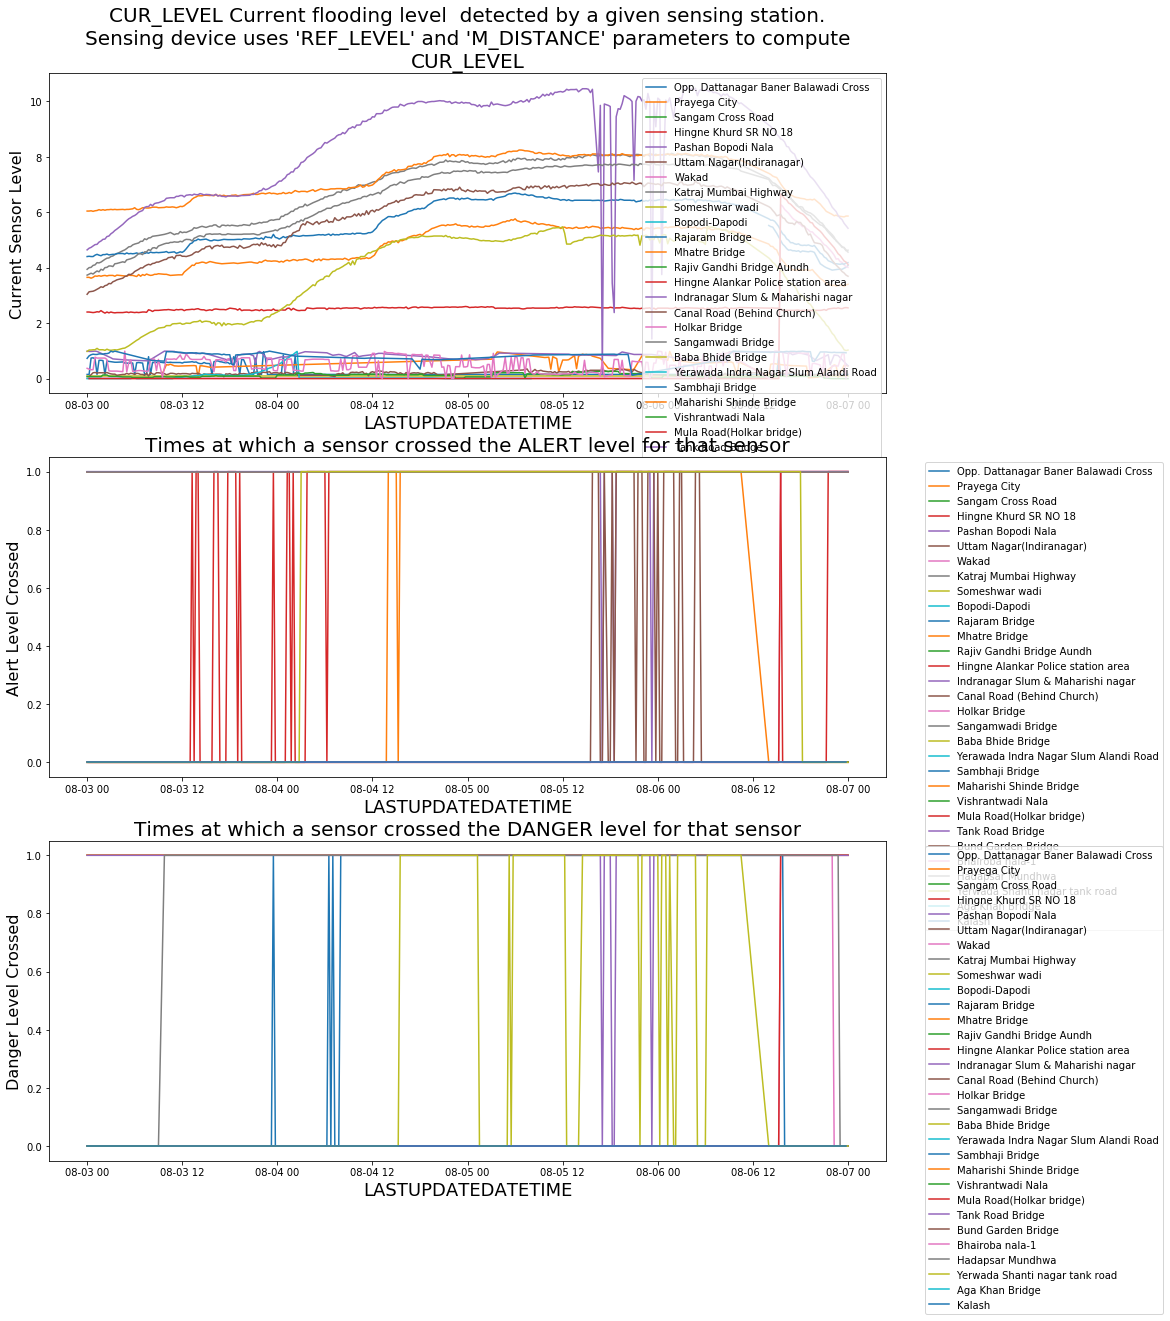

In [0]:
import matplotlib.pyplot as plt
from textwrap import wrap

fig, axis = plt.subplots(3,1,figsize=(15,20))
plt.subplot(3,1,1)
plt.title("\n".join(wrap(flood_sensors[1].CUR_LEVEL.name + "\n" + flood_sensors[1].CUR_LEVEL.describes)), fontsize=20)
for sensor in flood_sensors:
  plt.plot(sensor.CUR_LEVEL.value[:,0], sensor.CUR_LEVEL.value[:,1], label=sensor.id.split("/")[-1])
plt.legend()
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Current Sensor Level", fontsize=16)

plt.subplot(3,1,2)
plt.title("\n".join(wrap("Times at which a sensor crossed the ALERT level for that sensor")), fontsize=20)
for sensor in flood_sensors:
  crossed_alert = np.greater_equal(sensor.CUR_LEVEL.value[:,1], sensor.ALERT.value[:,1])
  plt.plot(sensor.ALERT.value[:,0], crossed_alert, label=sensor.id.split("/")[-1])
plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Alert Level Crossed", fontsize=16)

plt.subplot(3,1,3)
plt.title("\n".join(wrap("Times at which a sensor crossed the DANGER level for that sensor")), fontsize=20)
for sensor in flood_sensors:
  crossed_danger = np.greater_equal(sensor.CUR_LEVEL.value[:,1], sensor.DANGER.value[:,1])
  plt.plot(sensor.DANGER.value[:,0], crossed_danger, label=sensor.id.split("/")[-1])
plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Danger Level Crossed", fontsize=16)
plt.show()